In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/MSc_project/.MAIN

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import pandas as pd 
import pickle
import json
import os
import os.path
import numpy as np
import seaborn as sns
from collections import defaultdict
import joblib
import matplotlib.pyplot as plt
from matplotlib.ticker import (
                               FormatStrFormatter, 
                               AutoMinorLocator,
                               FuncFormatter,
                               )
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib inline

import os
os.chdir('G:\My Drive\MSc_project\.MAIN')
%pdb off

Automatic pdb calling has been turned OFF


## Categorical Data

In [3]:
hashtags = ['avengers','borisjohnson','blm','brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']


cats = ['sentiment', 'topic', 'topic_single', 'irony', 'emoji', 'offensive','gender']

sentiment_df = []

topic_df = []

topic_single_df = []

irony_df = []

emoji_df = []

offensive_df = []

gender_df = []

# lets get the average stats for each hashtag
for i, hashtag in enumerate(hashtags):

    df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')

    avg_df = df.describe(include='all')

    # CATEGORICAL DATA INFO

    cdf = df[df['is-infector']==1][cats]

    cdf.gender.replace(0,'Female',inplace=True)
    cdf.gender.replace(1,'Male',inplace=True)

    cdf.topic_single.replace(0, 'arts_&_culture', inplace = True) 
    cdf.topic_single.replace(1, 'business_&_entrepreneurs', inplace = True) 
    cdf.topic_single.replace(2, 'pop_culture', inplace = True) 
    cdf.topic_single.replace(3, 'daily_life', inplace = True) 
    cdf.topic_single.replace(4, 'sports_&_gaming', inplace = True) 
    cdf.topic_single.replace(5, 'science_&_technology', inplace = True) 


    cdf.topic.replace(0, 'arts & culture' , inplace = True)
    cdf.topic.replace(5, 'fashion & style' , inplace = True)
    cdf.topic.replace(10, ' learning & educational' , inplace = True)
    cdf.topic.replace(15, ' science & technology' , inplace = True)
    cdf.topic.replace(1, 'business & entrepreneurs' , inplace = True)
    cdf.topic.replace(6, 'film tv & video' , inplace = True)
    cdf.topic.replace(11, ' music' , inplace = True)
    cdf.topic.replace(16, ' sports' , inplace = True)
    cdf.topic.replace(2, 'celebrity & pop culture' , inplace = True)
    cdf.topic.replace(7, 'fitness & health' , inplace = True)
    cdf.topic.replace(12, ' news & social concern' , inplace = True)
    cdf.topic.replace(17, ' travel & adventure' , inplace = True)
    cdf.topic.replace(3, 'diaries & daily life	' , inplace = True)
    cdf.topic.replace(8, 'food & dining' , inplace = True)
    cdf.topic.replace(13, ' other hobbies' , inplace = True)
    cdf.topic.replace(18, ' youth & student life', inplace = True)
    cdf.topic.replace(4, 'family' , inplace = True)
    cdf.topic.replace(14, 'relationships' , inplace = True)
    cdf.topic.replace(9, 'gaming' , inplace = True)

    cdf.irony.replace(0,'Non-Ironic',inplace=True)
    cdf.irony.replace(1,'Ironic',inplace=True)


    sentiment_df.append(cdf['sentiment'].value_counts(normalize=True))

    topic_df.append(cdf['topic'].value_counts(normalize=True))

    topic_single_df.append(cdf['topic_single'].value_counts(normalize=True))

    irony_df.append(cdf['irony'].value_counts(normalize=True))

    emoji_df.append(cdf['emoji'].value_counts(normalize=True))

    offensive_df.append(cdf['offensive'].value_counts(normalize=True))

    gender_df.append(cdf['gender'].value_counts(normalize=True))



    print(f'added {hashtag} to consideration')


added avengers to consideration
added borisjohnson to consideration
added blm to consideration
added brexit to consideration
added climatechange to consideration
added covid to consideration
added gaza to consideration
added loveisland to consideration
added monkeypox to consideration
added nhs to consideration
added olivianewtonjohn to consideration
added supercup to consideration
added UkraineWar to consideration


In [10]:
sentiment = pd.DataFrame(sentiment_df)
sentiment.insert(0,column='hashtag',value = hashtags)
sentiment.to_csv('multisource_analysis/infector_scores/sentiment_summary.csv')

topic = pd.DataFrame(topic_df)
topic.insert(0,column='hashtag',value = hashtags)
topic.to_csv('multisource_analysis/infector_scores/topic_summary.csv')

topic_single = pd.DataFrame(topic_single_df)
topic_single.insert(0,column='hashtag',value = hashtags)
topic_single.to_csv('multisource_analysis/infector_scores/topic_single_summary.csv')

irony = pd.DataFrame(irony_df)
irony.insert(0,column='hashtag',value = hashtags)
irony.to_csv('multisource_analysis/infector_scores/irony_summary.csv')

emoji = pd.DataFrame(emoji_df)
emoji.insert(0,column='hashtag',value = hashtags)
emoji.to_csv('multisource_analysis/infector_scores/emoji_summary.csv')

offensive = pd.DataFrame(offensive_df)
offensive.insert(0,column='hashtag',value = hashtags)
offensive.to_csv('multisource_analysis/infector_scores/offensive_summary.csv')

gender = pd.DataFrame(gender_df)
gender.insert(0,column='hashtag',value = hashtags)
gender.to_csv('multisource_analysis/infector_scores/gender_summary.csv')

In [ ]:
all_avg_cdf.to_csv('multisource_analysis/average_categorical_scores.csv')
all_avg_sdf.to_csv('multisource_analysis/average_continuous_scores.csv')

## Ordinal Data

In [ ]:
df.columns

added borisjohnson to consideration
added blm to consideration
added brexit to consideration
added climatechange to consideration
added covid to consideration
added gaza to consideration
added loveisland to consideration
added monkeypox to consideration
added nhs to consideration
added olivianewtonjohn to consideration
added supercup to consideration
added UkraineWar to consideration


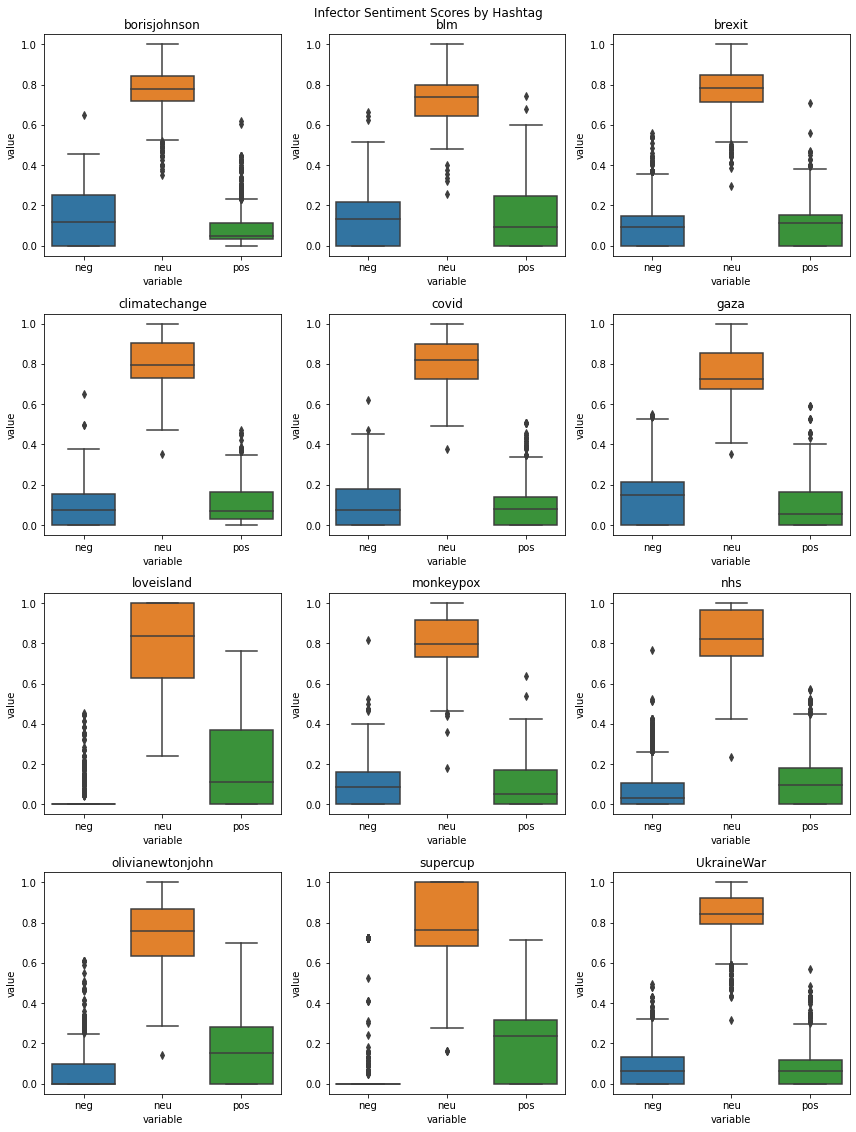

In [17]:
hashtags = ['borisjohnson','blm','brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']


cats = ['sentiment', 'topic', 'topic_single', 'irony', 'emoji', 'offensive','gender']

from pandas import plotting

all_sent = pd.DataFrame()
all_readability = pd.DataFrame()
all_topics = pd.DataFrame()
all_sing_topics = pd.DataFrame()
all_emotion = pd.DataFrame()
all_hate = pd.DataFrame()
all_genders = pd.DataFrame()

fig, axes = plt.subplots(4, 3, figsize=(12, 16))

fig.suptitle('Infector Sentiment Scores by Hashtag')


hashtag = hashtags[0]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['neg','neu','pos']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[1]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-informer','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['neg','neu','pos']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[2]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['neg','neu','pos']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[3]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['neg','neu','pos']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[4]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['neg','neu','pos']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[5]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['neg','neu','pos']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[6]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['neg','neu','pos']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[2,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[7]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['neg','neu','pos']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[2,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[8]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['neg','neu','pos']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[2,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[9]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['neg','neu','pos']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[3,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[10]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['neg','neu','pos']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[3,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[11]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['neg','neu','pos']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[3,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')

# set the spacing between subplots
fig.tight_layout()
plt.show()


fig.savefig('multisource_analysis/infector_scores/score_summaries/infector_sentiment_scores.png', bbox_inches='tight', pad_inches = 0.5, facecolor='w')


added borisjohnson to consideration
added blm to consideration
added brexit to consideration
added climatechange to consideration
added covid to consideration
added gaza to consideration
added loveisland to consideration
added monkeypox to consideration
added nhs to consideration
added olivianewtonjohn to consideration
added supercup to consideration
added UkraineWar to consideration


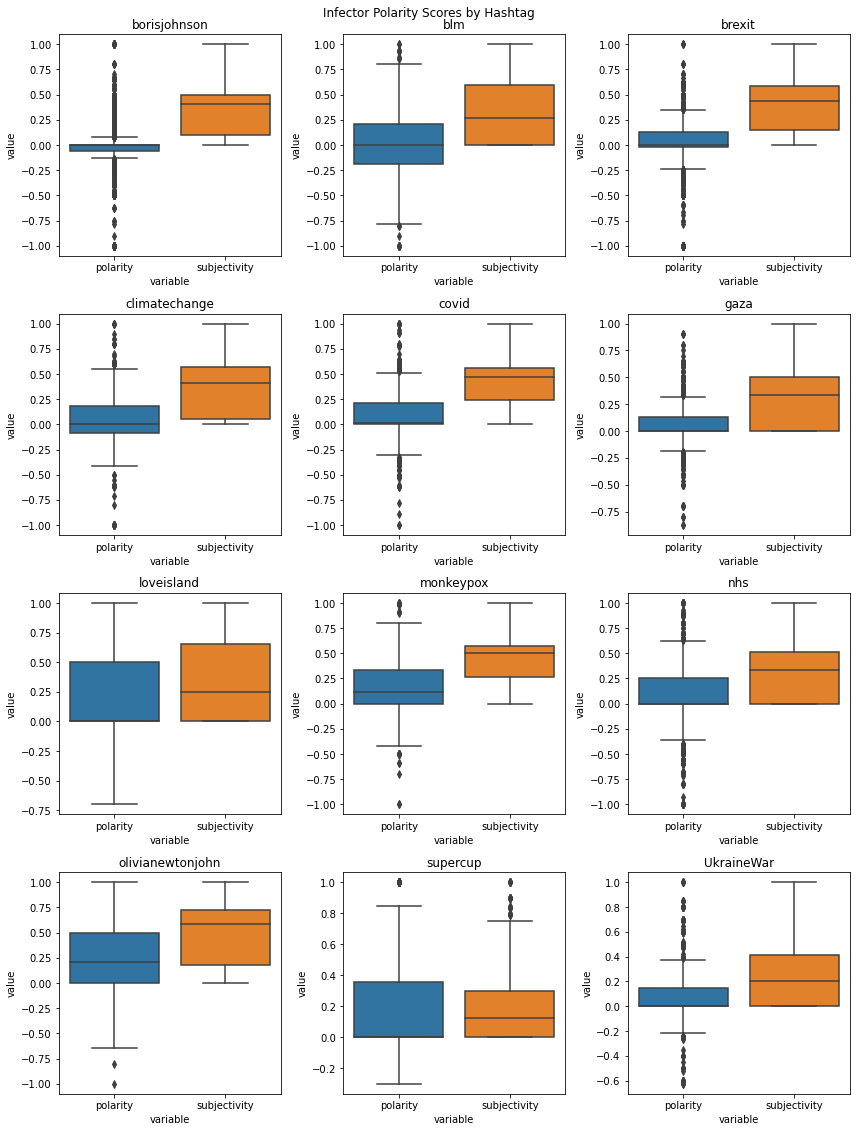

In [18]:
hashtags = ['borisjohnson','blm','brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']


cats = ['sentiment', 'topic', 'topic_single', 'irony', 'emoji', 'offensive','gender']

from pandas import plotting

all_sent = pd.DataFrame()
all_readability = pd.DataFrame()
all_topics = pd.DataFrame()
all_sing_topics = pd.DataFrame()
all_emotion = pd.DataFrame()
all_hate = pd.DataFrame()
all_genders = pd.DataFrame()

fig, axes = plt.subplots(4, 3, figsize=(12, 16))

fig.suptitle('Infector Polarity Scores by Hashtag')


hashtag = hashtags[0]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['polarity','subjectivity']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[1]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-informer','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['polarity','subjectivity']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[2]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['polarity','subjectivity']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[3]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['polarity','subjectivity']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[4]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['polarity','subjectivity']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[5]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['polarity','subjectivity']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[6]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['polarity','subjectivity']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[2,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[7]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['polarity','subjectivity']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[2,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[8]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['polarity','subjectivity']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[2,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[9]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['polarity','subjectivity']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[3,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[10]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['polarity','subjectivity']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[3,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[11]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['polarity','subjectivity']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[3,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')

# set the spacing between subplots
fig.tight_layout()
plt.show()


fig.savefig('multisource_analysis/infector_scores/score_summaries/infector_polarity_scores.png', bbox_inches='tight', pad_inches = 0.5, facecolor='w')


added borisjohnson to consideration
added blm to consideration
added brexit to consideration
added climatechange to consideration
added covid to consideration
added gaza to consideration
added loveisland to consideration
added monkeypox to consideration
added nhs to consideration
added olivianewtonjohn to consideration
added supercup to consideration
added UkraineWar to consideration


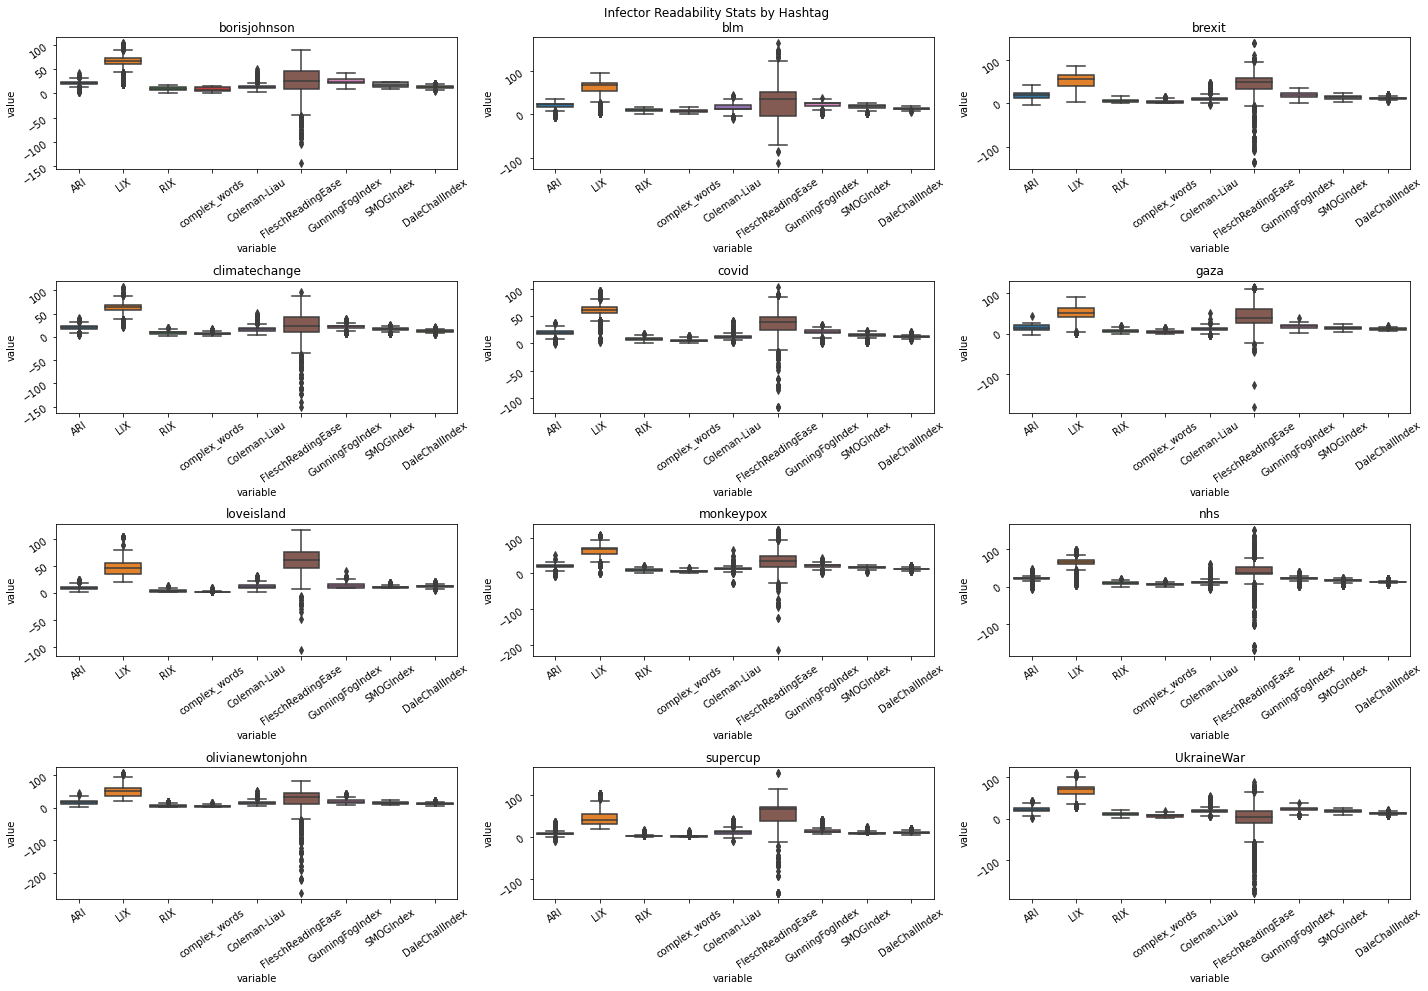

In [9]:
hashtags = ['borisjohnson', 'blm', 'brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']


cats = ['sentiment', 'topic', 'topic_single', 'irony', 'emoji', 'offensive','gender']

from pandas import plotting

all_sent = pd.DataFrame()
all_readability = pd.DataFrame()
all_topics = pd.DataFrame()
all_sing_topics = pd.DataFrame()
all_emotion = pd.DataFrame()
all_hate = pd.DataFrame()
all_genders = pd.DataFrame()

%matplotlib inline

fig, axes = plt.subplots(4, 3, figsize=(8, 14))


fig.suptitle('Politeness Stats by Hashtag')


hashtag = hashtags[0]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[1]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[2]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[3]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[4]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[5]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[6]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[2,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[7]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[2,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[8]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[2,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[9]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[3,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[10]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[3,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[11]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[3,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')

# set the spacing between subplots
fig.tight_layout()
plt.show()


fig.savefig('multisource_analysis/summary_scores/figs/tweet_politeness_scores.png', bbox_inches='tight', pad_inches = 0, facecolor='w')


added borisjohnson to consideration
added blm to consideration
added brexit to consideration
added climatechange to consideration
added covid to consideration
added gaza to consideration
added loveisland to consideration
added monkeypox to consideration
added nhs to consideration
added olivianewtonjohn to consideration
added supercup to consideration
added UkraineWar to consideration


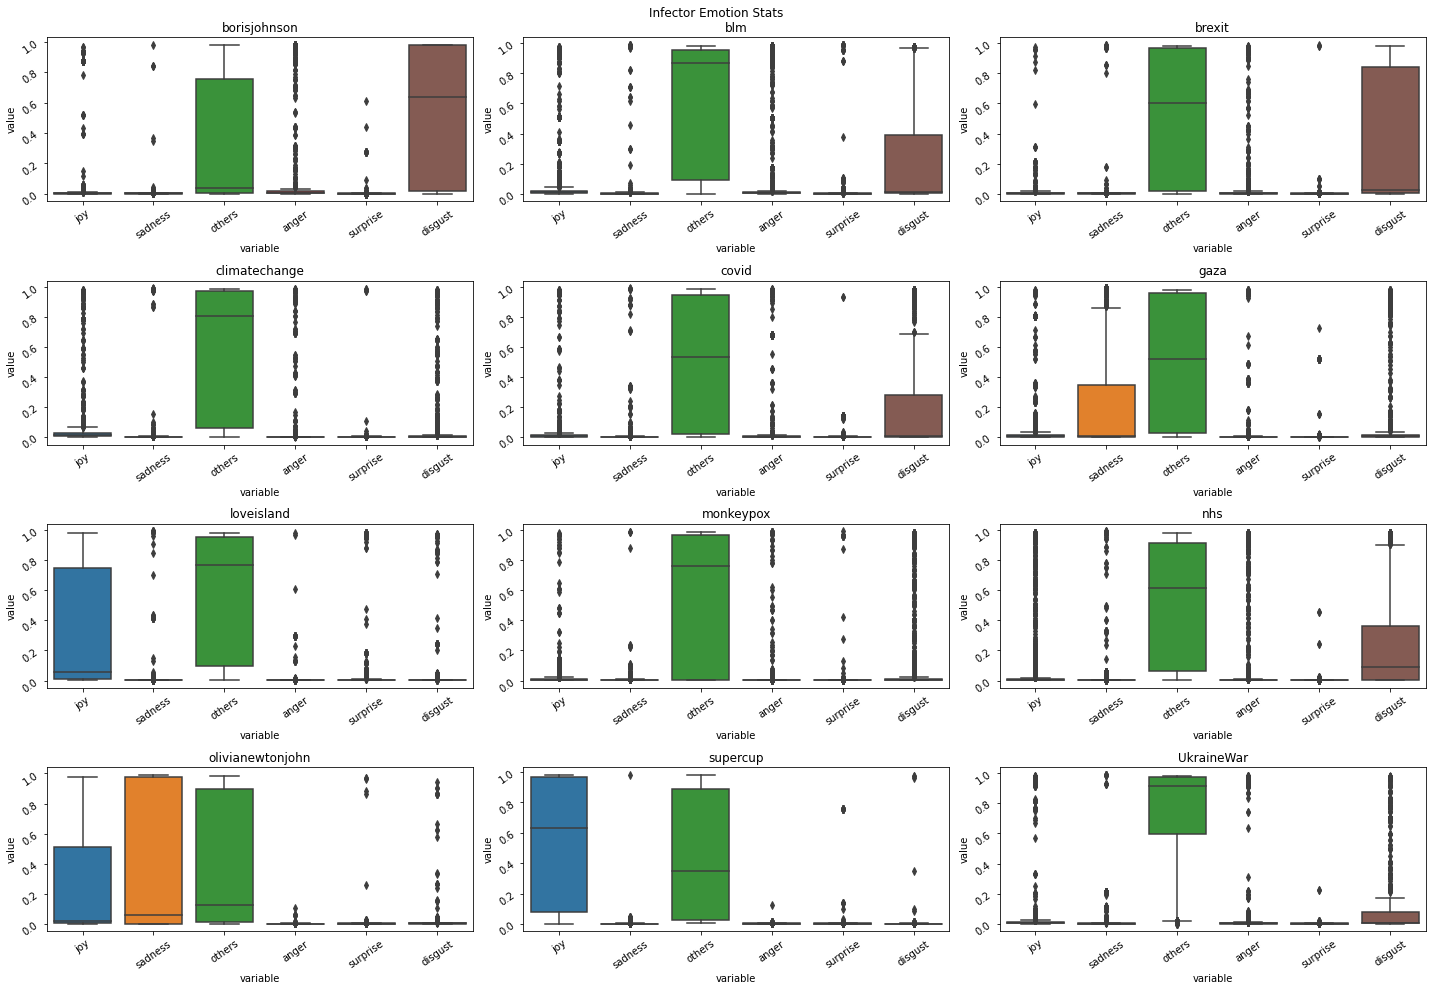

In [4]:
hashtags = ['borisjohnson', 'blm', 'brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']


cats = ['sentiment', 'topic', 'topic_single', 'irony', 'emoji', 'offensive','gender']

from pandas import plotting

all_sent = pd.DataFrame()
all_readability = pd.DataFrame()
all_topics = pd.DataFrame()
all_sing_topics = pd.DataFrame()
all_emotion = pd.DataFrame()
all_hate = pd.DataFrame()
all_genders = pd.DataFrame()

%matplotlib inline

fig, axes = plt.subplots(4, 3, figsize=(20, 14))

for ax in fig.axes:
    ax.tick_params(labelrotation=35)


fig.suptitle('Infector Emotion Stats')


hashtag = hashtags[0]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['joy', 'sadness', 'others',
       'anger', 'surprise', 'disgust']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[1]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['joy', 'sadness', 'others',
       'anger', 'surprise', 'disgust']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[2]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['joy', 'sadness', 'others',
       'anger', 'surprise', 'disgust']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[3]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['joy', 'sadness', 'others',
       'anger', 'surprise', 'disgust']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[4]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['joy', 'sadness', 'others',
       'anger', 'surprise', 'disgust']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[5]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['joy', 'sadness', 'others',
       'anger', 'surprise', 'disgust']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[6]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['joy', 'sadness', 'others',
       'anger', 'surprise', 'disgust']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[2,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[7]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['joy', 'sadness', 'others',
       'anger', 'surprise', 'disgust']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[2,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[8]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['joy', 'sadness', 'others',
       'anger', 'surprise', 'disgust']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[2,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[9]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['joy', 'sadness', 'others',
       'anger', 'surprise', 'disgust']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[3,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[10]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['joy', 'sadness', 'others',
       'anger', 'surprise', 'disgust']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[3,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[11]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['joy', 'sadness', 'others',
       'anger', 'surprise', 'disgust']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[3,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')

# set the spacing between subplots
fig.tight_layout()
plt.show()


fig.savefig('multisource_analysis/infector_scores/score_summaries/figs/infector_emotion_scores.png', bbox_inches='tight', pad_inches = 0, facecolor='w')


added borisjohnson to consideration
added blm to consideration
added brexit to consideration
added gaza to consideration
added loveisland to consideration
added UkraineWar to consideration


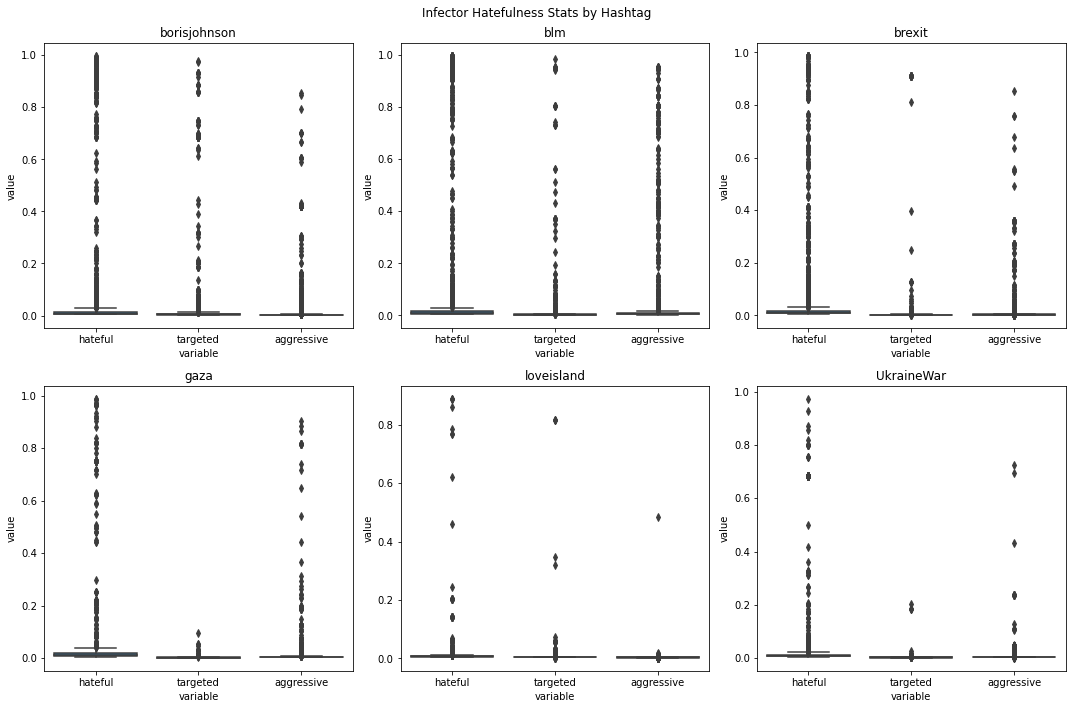

In [12]:
hashtags = ['borisjohnson','blm','brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']


cats = ['sentiment', 'topic', 'topic_single', 'irony', 'emoji', 'offensive','gender']

from pandas import plotting

all_sent = pd.DataFrame()
all_readability = pd.DataFrame()
all_topics = pd.DataFrame()
all_sing_topics = pd.DataFrame()
all_emotion = pd.DataFrame()
all_hate = pd.DataFrame()
all_genders = pd.DataFrame()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

fig.suptitle('Infector Hatefulness Stats by Hashtag')


hashtag = 'borisjohnson'

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['hateful', 'targeted', 'aggressive']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = 'blm'

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['hateful', 'targeted', 'aggressive']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = 'brexit'

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['hateful', 'targeted', 'aggressive']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = 'gaza'

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['hateful', 'targeted', 'aggressive']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = 'loveisland'

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['hateful', 'targeted', 'aggressive']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = 'UkraineWar'

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['hateful', 'targeted', 'aggressive']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')

# set the spacing between subplots
fig.tight_layout()
plt.show()


fig.savefig('multisource_analysis/infector_scores/score_summaries/figs/infector_hateful_scores.png', bbox_inches='tight', pad_inches = 0, facecolor='w')


added borisjohnson to consideration
added blm to consideration
added brexit to consideration
added climatechange to consideration
added covid to consideration
added gaza to consideration
added loveisland to consideration
added monkeypox to consideration
added nhs to consideration
added olivianewtonjohn to consideration
added supercup to consideration
added UkraineWar to consideration


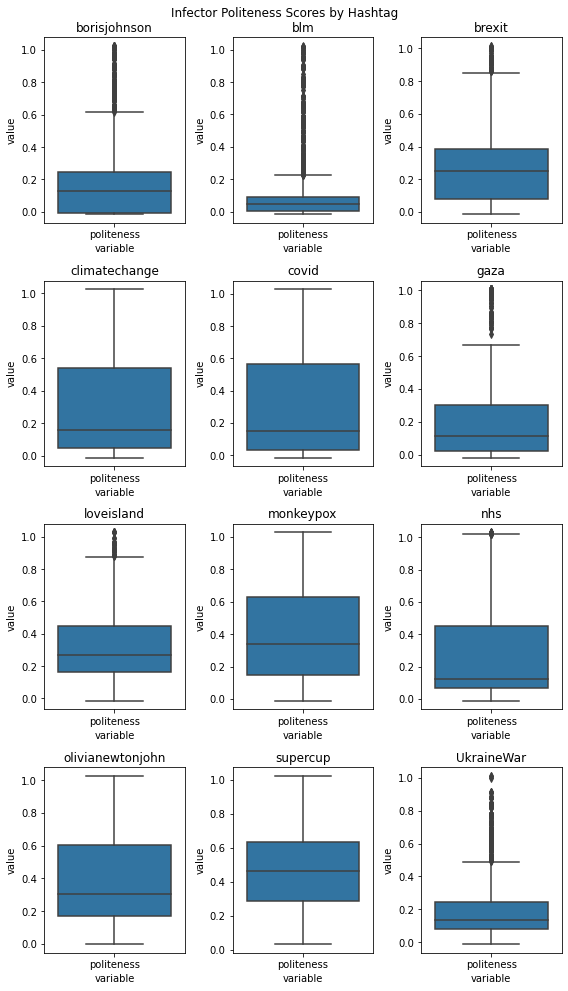

In [14]:
hashtags = ['borisjohnson', 'blm', 'brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']


cats = ['sentiment', 'topic', 'topic_single', 'irony', 'emoji', 'offensive','gender']

from pandas import plotting

all_sent = pd.DataFrame()
all_readability = pd.DataFrame()
all_topics = pd.DataFrame()
all_sing_topics = pd.DataFrame()
all_emotion = pd.DataFrame()
all_hate = pd.DataFrame()
all_genders = pd.DataFrame()

%matplotlib inline

fig, axes = plt.subplots(4, 3, figsize=(8, 14))


fig.suptitle('Infector Politeness Scores by Hashtag')


hashtag = hashtags[0]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[1]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[2]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[3]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[4]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[5]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[6]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[2,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[7]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[2,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[8]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[2,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[9]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[3,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[10]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[3,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[11]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['politeness']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[3,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')

# set the spacing between subplots
fig.tight_layout()
plt.show()


fig.savefig('multisource_analysis/infector_scores/score_summaries/figs/infector_politeness_scores.png', bbox_inches='tight', pad_inches = 0, facecolor='w')


added borisjohnson to consideration
added blm to consideration
added brexit to consideration
added climatechange to consideration
added covid to consideration
added gaza to consideration
added loveisland to consideration
added monkeypox to consideration
added nhs to consideration
added olivianewtonjohn to consideration
added supercup to consideration
added UkraineWar to consideration


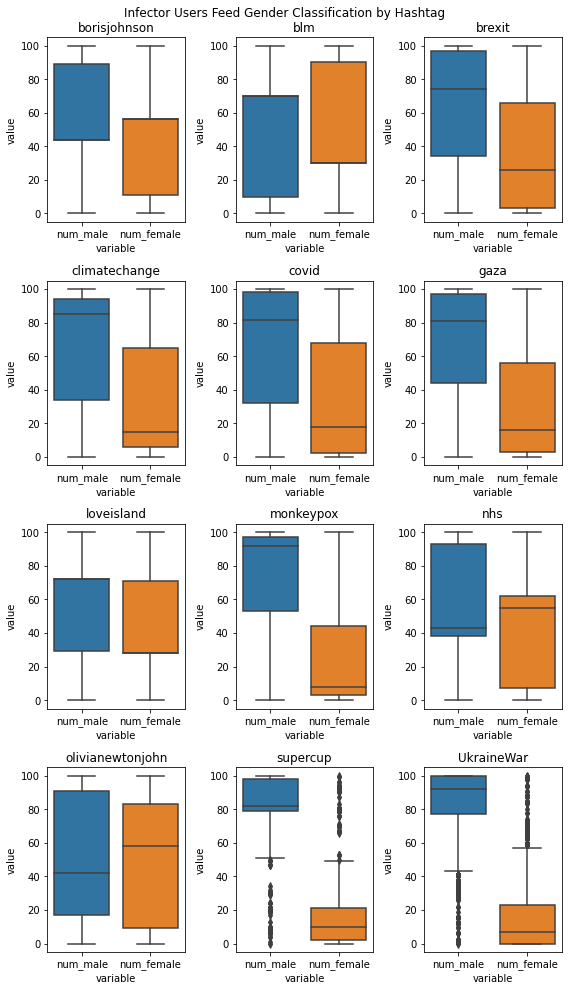

In [16]:
hashtags = ['borisjohnson', 'blm', 'brexit','climatechange','covid','gaza','loveisland','monkeypox','nhs','olivianewtonjohn','supercup','UkraineWar']


cats = ['sentiment', 'topic', 'topic_single', 'irony', 'emoji', 'offensive','gender']

from pandas import plotting

all_sent = pd.DataFrame()
all_readability = pd.DataFrame()
all_topics = pd.DataFrame()
all_sing_topics = pd.DataFrame()
all_emotion = pd.DataFrame()
all_hate = pd.DataFrame()
all_genders = pd.DataFrame()

%matplotlib inline

fig, axes = plt.subplots(4, 3, figsize=(8, 14))


fig.suptitle('Infector Users Feed Gender Classification by Hashtag')


hashtag = hashtags[0]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['num_male','num_female']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[1]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['num_male','num_female']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[2]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['num_male','num_female']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[0,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[3]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['num_male','num_female']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[4]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['num_male','num_female']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[5]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['num_male','num_female']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[1,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[6]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['num_male','num_female']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[2,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[7]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['num_male','num_female']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[2,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[8]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['num_male','num_female']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[2,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[9]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['num_male','num_female']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[3,0]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[10]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['num_male','num_female']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[3,1]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')


hashtag = hashtags[11]

df = pd.read_csv(f'multisource_analysis/data/{hashtag}_scored_tweets.csv')
df = df.copy()[df['is-infector']==1]
df.drop(['text.1', 'Unnamed: 0', 'target','is-target','is-infector','is-informer','text','hashtag','user_id'], inplace = True, axis =1)

sent_df = df[['num_male','num_female']]
sns.boxplot( x = "variable", y="value", data = pd.melt(sent_df), ax = axes[3,2]).set(title=f'{hashtag}')

print(f'added {hashtag} to consideration')

# set the spacing between subplots
fig.tight_layout()
plt.show()


fig.savefig('multisource_analysis/infector_scores/score_summaries/figs/infector_num_gender_scores.png', bbox_inches='tight', pad_inches = 0, facecolor='w')
